In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML, IFrame
from ipywidgets import interact,fixed, FloatSlider, IntSlider, Dropdown, HBox, VBox, Checkbox
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.patches import Rectangle, Circle

from numpy.linalg import norm
from numpy import cos,sin,tan,arctan,exp,log,pi,sqrt,arange,linspace,meshgrid,array

from scipy.integrate import quad, dblquad, tplquad

%matplotlib widget

plt.rcParams.update({
    "figure.figsize": (8,8),
    "text.usetex": True,
    "font.family": "serif",
})

# Uncomment the one that corresponds to your Jupyter theme
plt.style.use('default')
# plt.style.use('dark_background')
# plt.style.use('fivethirtyeight')
# plt.style.use('Solarize_Light2')

$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\bv}[1]{\begin{bmatrix} #1 \end{bmatrix}}$
$\renewcommand{\vec}{\mathbf}$


In [2]:
%%html

<style>
.shadow {

    /*Edit or add new attributes, change size, color, etc */
    width: 75%;
    box-shadow: 8px 8px 10px #444;
    border: 1px solid silver;

    /*For positioning in a jupyter notebook*/
    margin-top: 2em;
    position: relative;
    top: -25px
}

ol li {
    padding: .5em;
}
</style>

# One-minute Review

Suppose the same mass $M$ were distributed evenly over the following regions in space:
  - $B$ a solid ball of radius $R$.
  - $S$ a (hollow) sphere of radius $R$.
  - $C$ a ring (circle) of radius $R$. 
  
Which has the greatest moment of intertia about its center? 

<p style="padding-bottom:40%;"> </p>

# Lecture 17 - Line Integrals & Vector Fields

  - Objectives
    - Line Integrals

  - Resources
    - [Interactive Demo](https://drew.youngren.nyc/3Demos/lineint/index.html)
    - Content
      - Stewart: §16.1–3
      - New Strang:  
        - [§6.2](https://openstax.org/books/calculus-volume-3/pages/6-2-line-integrals)
      - [3Demos](https://drew.youngren.nyc/3Demos/lineint/)
  - Practice
    - Mooculus: [Line Integrals](https://ximera.osu.edu/mooculus/calculus3/lineIntegrals/digInLineIntegrals)
    - Extras
      - CalcBLUE: [Path Integrals](https://www.youtube.com/watch?v=8333W0vsqBc&list=PL8erL0pXF3JYCn8Xukv0DqVIXtXJbOqdo&index=9) 

<div class="alert alert-block alert-success shadow"> 
<strong> A quick note on integrals</strong>

Every integral has three essential parts, summarized as the "where", the "what", and the "how".

$$\int_D F\,d\omega $$
    
<ul>
    <li><strong>Where?</strong> the domain of integration $D$</li>
    <li><strong>What?</strong> the integrand $F$</li>
    <li><strong>How?</strong> the differential (form) $d\omega$</li>
</ul>
    
<p>We'll be seeing a lot of different integrals in vector calculus, you can keep yourself oriented by thinking about each of these for every integral we encounter.
</p>
</div>



<p style="padding-bottom:40%;"> </p>

## We need a new integral. 

In the question above, $C$ is a 1-dimensional object in 3-dimensional space. We cannot do a triple integral $\iiint_C f\,dV$ as we would get 0 for any $f$. 

If the mass $M$ is distributed evenly, that would mean a _linear density_ of $\frac{M}{2\pi R} \frac{\text{unit of mass}}{\text{unit of length}}$.

We thus need an integral $$\int_C (\text{distance to axis})^2 \times (\text{linear density})\,d(\text{length}).$$

This requires a new integral called a **line integral** or **path integral**.



<p style="padding-bottom:40%;"> </p>

<!-- <div class="alert alert-block alert-info shadow"> 
<h2>Path Integrals</h2>

A <strong>line integral</strong>, also called a <strong>path integral</strong>, is an integral whose domain of integration is $C$, the <em>image</em> of a curve parametrized by $\vec r(t)$.  

They come in different "flavors" based on the integrand and the differential, but all have a domain of integration that is a path in space.
</div> -->

## Path Integrals

A **path integral**, also called a **line integral**, is an integral whose domain of integration is $C$, the _image_ of a curve parametrized by $\vec r(t)$.  

They come in different "flavors" based on the integrand and the differential, but all have a domain of integration that is a path in space.

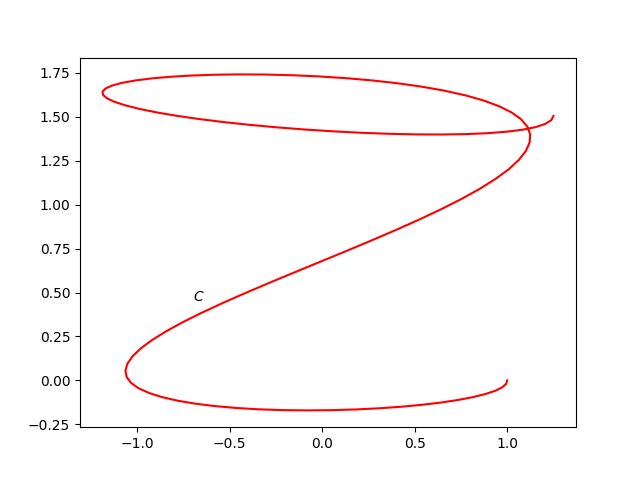

In [3]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE)
    plt.ion()
    
    r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
    t = np.linspace(0,1,100)
    ax.plot(*r(t),'-r')
    ax.text(-.7,.45,"$C$");
        
    return fig.canvas

a("A curve")


<p style="padding-bottom:40%;"> </p>

## Path integrals w/ respect to arc length

$$\int_C f\,ds$$

  - Where? path in space $C$
  - What? scalar field $f(x,y,\ldots)$
  - How? w.r.t. arc length $ds$

<p style="padding-bottom:40%;"> </p>

**Interpretation**: One way to think of this quantity is as the area of a wall built over $C$ with height given by $f$.

In [4]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
    f = lambda x,y: x**2 + y**2/4
    t = np.linspace(0,1,100)
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    s = slider.value
    x = linspace(0,2,100)
    
    u = np.linspace(-1,1,100) 
    v = np.linspace(-1,2,100) 

    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot(*r(t),np.zeros_like(t),'-r')
    
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.grid(True)
    
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    pl = [ax.plot_surface(*r(w), z*f(*r(w)), color='r')]
    
    def update(change):
        s = slider.value
        w = np.linspace(0,s,77)
        w,z = np.meshgrid(w,np.linspace(0,1,50))
        if pl: ax.collections.remove(pl[0])
        pl[0] = ax.plot_surface(*r(w), z*f(*r(w)), color='r')
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a(r"w/r/t arc length")




<p style="padding-bottom:40%;"> </p>

## Formula

$$\int_C f\,ds \approx \sum_{i=1}^n f(x_i^*,y_i^*)\,\Delta s_i$$

where $\Delta s_i = \sqrt{\Delta x_i^2 + \Delta y_i^2}$. 

To compute this, we need a **parametrization** for $C$. That is, a space curve $\vec r(t) = x(t)\,\vec i +  y(t)\,\vec j$ for $a \leq t \leq b$. Then this becomes in the limit

$$\int_C f\,ds = \int_a^b f(x(t),y(t)) |\vec r'(t)| dt.$$

<p style="padding-bottom:40%;"> </p>

## Path integral with respect to a coordinate

$$\int_C f\,dx \qquad \text{ or } \qquad \int_C f\,dy$$

  - Where? path in space $C$
  - What? scalar field $f(x,y,\ldots)$
  - How? w.r.t. to coordinate $dx$ (or $dy$ or ...)

<p style="padding-bottom:40%;"> </p>

## Formula

$$\int_C f\,dx \approx \sum_{i=1}^n f(x_i^*,y_i^*)\,\Delta x_i$$

where $\Delta x_i$ can be positive or negative. 

To compute this, we need a **parametrization** for $C$. That is, a space curve $\vec r(t) = x(t)\,\vec i +  y(t)\,\vec j$ for $a \leq t \leq b$. Then this becomes in the limit

$$\int_C f\,dx = \int_a^b f(x(t),y(t)) \,x'(t)\, dt.$$

$$\int_C f\,dy = \int_a^b f(x(t),y(t))\, y'(t)\, dt.$$

**Interpretation**: This is more abstract. We accumulate products of the integrand with the change in a particlular direction along a path.

The same function and curve are shown with representations of the integral with respect to 
  - $ds$ (red)
  - $dx$ (blue)
  - $dy$ (green)

In [5]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    r = lambda t: np.array([(1+t/4)*cos(4*pi*t),2*t - sin(8*t)/2])
    f = lambda x,y: x**2 + y**2/4
    t = np.linspace(0,1,100)
    
    slider = FloatSlider(min=0, max=1, step=.01, value=0)
    s = slider.value
    # x = linspace(0,2,100)
    
    boxes = []
    for chk in ["ds", "dx", "dy", "graph"]:
        boxes.append(Checkbox(value=False, description=chk))
    
    u = np.linspace(-1,1,100) 
    v = np.linspace(-1,2,100) 

    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot(*r(t),np.zeros_like(t),'-r')
    
    for c in 'xyz':
#         getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.grid(True)
    
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    pl = []
    
    def update(change):
        s = slider.value
        w = np.linspace(0,s,77)
        w,z = np.meshgrid(w,np.linspace(0,1,50))
        for p in pl:
            ax.collections.remove(p)
        while pl:
            pl.pop()
        if boxes[0].value:
            pl.append(ax.plot_surface(*r(w), z*f(*r(w)), color='r'))
        if boxes[1].value:
            pl.append(ax.plot_surface(r(w)[0,:],0*w - 1,z*f(*r(w)),color='b',alpha=.5))
        if boxes[2].value:
            pl.append(ax.plot_surface(0*w - 1.2,r(w)[1,:],z*f(*r(w)),color='g',alpha=.5))


    slider.observe(update, names='value')
    for b in boxes:
        b.observe(update, names='value')

      
    return VBox([slider, HBox(boxes), fig.canvas])

a(r"Line integrals of a scalar field")




<p style="padding-bottom:40%;"> </p>

<p style="padding-bottom:40%;"> </p>

## Example

Let $C$ be the piece of the parabola $y=(x-1)^2$ from $(0,1)$ to $(3,4)$, and let $f(x,y) = x+y$. 

Compare the line integrals $\int_C f\, dx$, $\int_C f\, dy$, and $\int_C f\, ds$.

In [6]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig = plt.figure(num=TITLE)
    plt.ion()
    ax = fig.add_subplot(projection='3d')
    
    r = lambda t: np.array([t, (t-1)**2])
    f = lambda x,y: x + y
    t = np.linspace(0,3,200)
    
    slider = FloatSlider(min=0, max=3, step=.01, value=0)
    s = slider.value
    # x = linspace(0,2,100)
    
    boxes = []
    for chk in ["ds", "dx", "dy", "graph"]:
        boxes.append(Checkbox(value=False, description=chk))
    
    u = np.linspace(0, 4, 100) 
    v = np.linspace(0, 4, 100) 

    U,V = np.meshgrid(u,v)
    ax.plot_surface(U,V,f(U,V),alpha=.4)
    ax.plot(*r(t),np.zeros_like(t),'-r')
    
    ax.set_xlim([0,4])
    ax.set_ylim([0,4])
    ax.set_zlim([0,8])
    for c in 'xyz':
        # getattr(ax,f"set_{c}lim")([-1,1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
    
    ax.grid(True)
    
    w = np.linspace(0,s,77)
    w,z = np.meshgrid(w,np.linspace(0,1,50))
    pl = []
    
    def update(change):
        s = slider.value
        w = np.linspace(0,s,77)
        w,z = np.meshgrid(w,np.linspace(0,1,50))
        for p in pl:
            ax.collections.remove(p)
        while pl:
            pl.pop()
        if boxes[0].value:
            pl.append(ax.plot_surface(*r(w), z*f(*r(w)), color='r'))
        if boxes[1].value:
            pl.append(ax.plot_surface(r(w)[0,:],0*w - .2,z*f(*r(w)),color='b',alpha=.5))
        if boxes[2].value:
            pl.append(ax.plot_surface(0*w - .2,r(w)[1,:],z*f(*r(w)),color='g',alpha=.5))


    slider.observe(update, names='value')
    for b in boxes:
        b.observe(update, names='value')

      
    return VBox([slider, HBox(boxes), fig.canvas])

a(r"Line int example")

In [7]:
quad(lambda t: (t + (t-1)**2)*1, 0, 3)[0] # dx

7.5

In [8]:
quad(lambda t: (t + (t-1)**2)*2*(t-1), 0, 3)[0] # dy

16.5

In [9]:
quad(lambda t: (t + (t-1)**2)*sqrt(1 + 4*(t-1)**2), 0, 3)[0] # ds

20.112610715968604

<p style="padding-bottom:40%;"> </p>

## Vector Fields

A **vector field** is a function $$\vec F: \RR^n \to \RR^n$$

or a vector-value function of several variables. In $\RR^2$, we write

$$\vec F(x,y) = \langle P(x,y), Q(x,y) \rangle$$ and in $\RR^3$, we write $$\vec F(x,y,z) = P(x,y,z)\,\vec i + Q(x,y,z)\,\vec j + R(x,y,z)\,\vec k.$$

<p style="padding-bottom:40%;"> </p>

### Examples

Run the cell below to generate the graph of a vector field where each component is selected from among the functions $$\{\pm 1, \pm x, \pm y, \pm x^2, \pm y^2\}$$

In [10]:

def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(6,6))
    plt.ion()
    
    inds = [[], []]
    
    x = y = linspace(-1.1,1.1,10)
    
    x,y = meshgrid(x,y)
    
    funcs = [np.ones_like(x), x, y, x**2, y**2]
    func_strings = [["1", "x", "y", "x^2", "y^2"], ["-1", "-x", "-y", "-x^2", "-y^2"]]
    
    check = Checkbox(value=False, description ="solution")
    
    ax.set_xlim(-1.2,1.2)
    ax.set_ylim(-1.2,1.2)
    # ax.grid(True)
    
    def update(change):
        solution = check.value
        if not solution:
            inds[0] = np.random.randint(0,5, 2)
            inds[1] = np.random.randint(0,2, size=2)
            i,j = inds[0]
            k,l = inds[1]
            
            while ax.collections:
                ax.collections.pop()
            
            u, v = (-1)**k*funcs[i], (-1)**l*funcs[j]
            ax.set_title("")
            ax.quiver(x,y,u,v)
            
        else:
            i,j = inds[0]
            k,l = inds[1]
            ax.set_title(f"$\mathbf{{F}}(x,y) = \\langle {func_strings[k][i]}, {func_strings[l][j]} \\rangle$",fontsize=20,loc="center")
    
    check.observe(update, names='value')
    update({})
    
    return VBox([check, fig.canvas])

a("Vector fields")



# @interact
# def _(solution=False):
#     x = y = linspace(-1.1,1.1,10)
    
#     x,y = meshgrid(x,y)
#     funcs = [np.ones_like(x), x, y, x**2, y**2]
#     func_strings = [["1", "x", "y", "x^2", "y^2"], ["-1", "-x", "-y", "-x^2", "-y^2"]]
#     if not solution:
#         i, j = np.random.randint(0,5, 2)
#         k, l = np.random.randint(0,2, size=2)
#     else:
#         plt.title(f"$\mathbf{{F}}(x,y) = \\langle {func_strings[k][i]}, {func_strings[l][j]} \\rangle$",fontsize=20,loc="center")
#     u, v = (-1)**k*funcs[i], (-1)**l*funcs[j]
#     plt.quiver(x,y,u,v)
#     plt.xlim(-1.2,1.2)
#     plt.ylim(-1.2,1.2)
#     flush_figures()

<div style="padding-bottom: 40%"></div>

## Path integral of a vector field

$$\int_C \vec F\cdot d\vec r$$

  - Where? path in space $C$
  - What? vector field $\vec F(x,y,\ldots)$
  - How? w.r.t. to direction of line $d\vec r$

<div style="padding-bottom: 40%"></div>

**Interpretation**: This quantity measures how much the vector field $\vec F$ pushes along the path $C$ (which must be oriented).

  - If $\vec F$ is a force, and $C$ is the path of an object, the line integral is the work done by the force on the object.
  - Consider the [question](https://en.wikipedia.org/wiki/Wind_assistance#Road_running) of whether a marathon run was "wind-assisted."

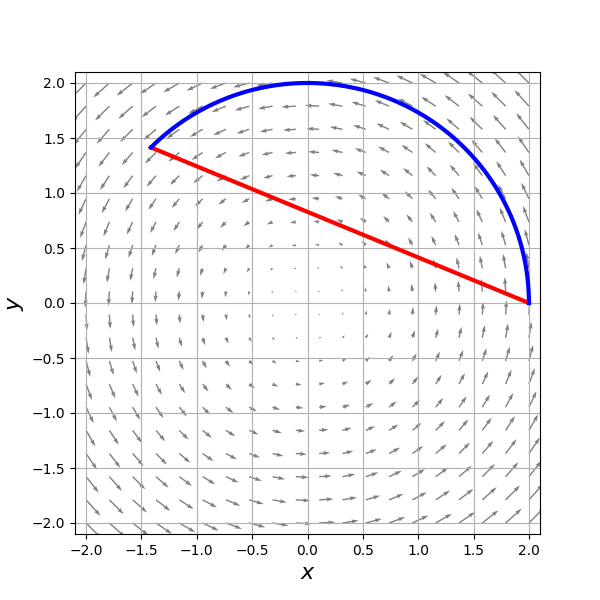

In [11]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(6,6))
    plt.ion()
    
    x = y = np.linspace(-2,2,20)
    x,y = np.meshgrid(x,y)

    ax.quiver(x,y,-y,x,color='gray');
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2.1,2.1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
        
    t= np.linspace(0,1,100)    
    ax.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
    ax.plot(2*cos(t*3*pi/4),2*sin(t*3*pi/4),'b',lw=3);
    ax.grid(True)
    
    return fig.canvas

a("Line integral of a vector field")

<div style="padding-bottom: 40%"></div>

## Formula

$$\int_C \vec F\cdot d\vec r \approx \sum_{i=1}^n \vec F(x_i^*,y_i^*)\cdot\langle \Delta x_i,\Delta y_i\rangle$$

where $\Delta x_i, \Delta y_i$ can be positive or negative. 

To compute this, we need a **parametrization** for $C$. That is, a space curve $\vec r(t) = x(t)\,\vec i +  y(t)\,\vec j$ for $a \leq t \leq b$. Then this becomes in the limit

$$\int_C \vec F\cdot d\vec r = \int_a^b \vec F(\vec r(t)) \cdot \vec r'(t)\, dt.$$

<div class="alert alert-block alert-warning shadow"> 
<strong>Alternate Formulae</strong>
    
If $ \vec F(x,y) =  P(x,y)\,\vec i +  Q(x,y)\,\vec j $, then this becomes
$$ \int_a^b \vec F(x(t),y(t)) \cdot \langle x'(t),y'(t) \rangle\, dt = \int_C P\, dx + Q\,dy.$$    

If $ \vec T(t) = \frac{\vec r'(t)}{|\vec r'(t)|}$ is the usual unit tangent vector in the direction of the curve., then this becomes
$$ \int_a^b \vec F(\vec r(t)) \cdot \vec T(t)\,|\vec r'(t)|\, dt = \int_C \vec F\cdot\vec T \,ds.$$ 
   
</div>

<div style="padding-bottom: 40%"></div>

## Examples

See the [exercises notebook](../exercises/L17-Exercises-Solutions.ipynb) for solutions.

<div style="padding-bottom: 40%"></div>

### Work

$$\text{work} = \text{force}\times \text{distance} $$

but what if the force (or the distance) is changing continuously?

<div style="padding-bottom: 40%"></div>

#### Hooke's Law

A spring with constant $k$ compresses from 7 cm to 4 cm (past equilibrium). How much work was done by the spring?

In [12]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(10,3))
    plt.ion()
    
    slider = FloatSlider(min=4, max=7, step=.01, value=7)
    t = slider.value
    x = linspace(0,1,200)
    
    pl = ax.plot(t*x + .3*sin(14*pi*x), cos(14*pi*x))
    pl2 = ax.plot([t, t + 1, t + 1, t, t], [-1, -1, 1, 1, -1])
    ax.set_xlim((-2,8))
    ax.set_ylim((-1.5,1.5))
    ax.plot([0,0],[-2,2],'k',lw=3)

    # ax.grid(True)
    
    def update(change):
        t = slider.value
        pl[0].set_data(t*x + .3*sin(14*pi*x), cos(14*pi*x))
        pl2[0].set_data([t, t + 1, t + 1, t, t], [-1, -1, 1, 1, -1])
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("A spring")

<div style="padding-bottom: 40%"></div>

#### Rolling down a ramp. 

A ball falls down a parabolic ramp $y=x^2$ from $(-2,4)$ to the origin. How much work was done by gravity?

In [13]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(6,6))
    plt.ion()
    
    slider = FloatSlider(min=-2, max=0, step=.01, value=-2)
    t = slider.value
    x = linspace(-2, 0, 100)
    
    pos = array((t, t**2))
    n = array((-2*t, 1))
    n = n / norm(n)
    c = ax.add_patch(Circle(pos + .1*n, .1, fill=True))
    
    pl = ax.plot(x,x**2)
    ax.set_xlim((-2, 2))
    ax.set_ylim((0, 4))

    # ax.grid(True)
    
    def update(change):
        t = slider.value
    
        while ax.patches:
            ax.patches.pop()
        pos = array((t, t**2))
        n = array((-2*t, 1))
        n = n / norm(n)
        ax.add_patch(Circle(pos + .1*n, .1, fill=True))
    
    slider.observe(update, names='value')
    
    return VBox([slider, fig.canvas])

a("Ball on parabola")

<div style="padding-bottom: 40%"></div>

### Exercise

![Line integral of vector field example from Stewart](../img/stew-lineintex.png)

#### Solution

$$\int_{C_1}\vec F\cdot \vec r > 0$$

$$\int_{C_2}\vec F\cdot \vec r < 0$$

####
<div style="padding-bottom: 40%"></div>

## Example

Compute $\int_C \vec F \cdot d\vec r$ for the two paths below from $(2,0)$ to $(-\sqrt{2},\sqrt{2})$ in the field $\langle -y,x \rangle$. Try to predict which is greater before you start.

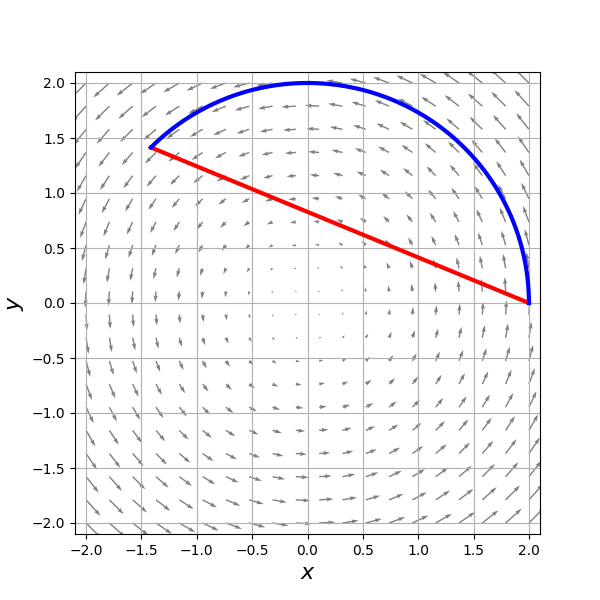

In [14]:
def a(TITLE):
    if TITLE in plt.get_figlabels():
        plt.close(plt.figure(TITLE))
    
    plt.ioff()
    fig, ax = plt.subplots(num=TITLE, figsize=(6,6))
    plt.ion()
    
    x = y = np.linspace(-2,2,20)
    x,y = np.meshgrid(x,y)

    ax.quiver(x,y,-y,x,color='gray');
    for c in 'xy':
        getattr(ax,f"set_{c}lim")([-2.1,2.1]);    
        getattr(ax,f"set_{c}label")(f"${c}$",size=16)
        
    t= np.linspace(0,1,100)    
    ax.plot(2 - (2+sqrt(2))*t,sqrt(2)*t,'r',lw=3);
    ax.plot(2*cos(t*3*pi/4),2*sin(t*3*pi/4),'b',lw=3);
    ax.grid(True)
    
    return fig.canvas

a("Two paths")